In [1]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

### 1) When $J_2=0$

In [2]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_full_1D(N)
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse)  
end;

  0.454496 seconds (314.00 k allocations: 25.649 MiB, 95.25% compilation time)


In [3]:
@time XY_energy,XY_eigenvector = eigen(H_XY);

  2.795040 seconds (578.18 k allocations: 50.784 MiB, 1.19% gc time, 85.61% compilation time)


#### I) Individual Scar state overlap

In [12]:
overlap_list::Vector{Float64} = Vector{Float64}(undef,H_size)
n::Int64 = 2
scar_state = scar_state_1D(N,n,basis_list)

for (i,E) in enumerate(XY_energy)
    overlap_list[i] = log10(abs2(dot(XY_eigenvector[:,i],scar_state)))
end;

In [13]:
max_overlap,max_index = findmax(overlap_list)

(3.857309866213147e-16, 184)

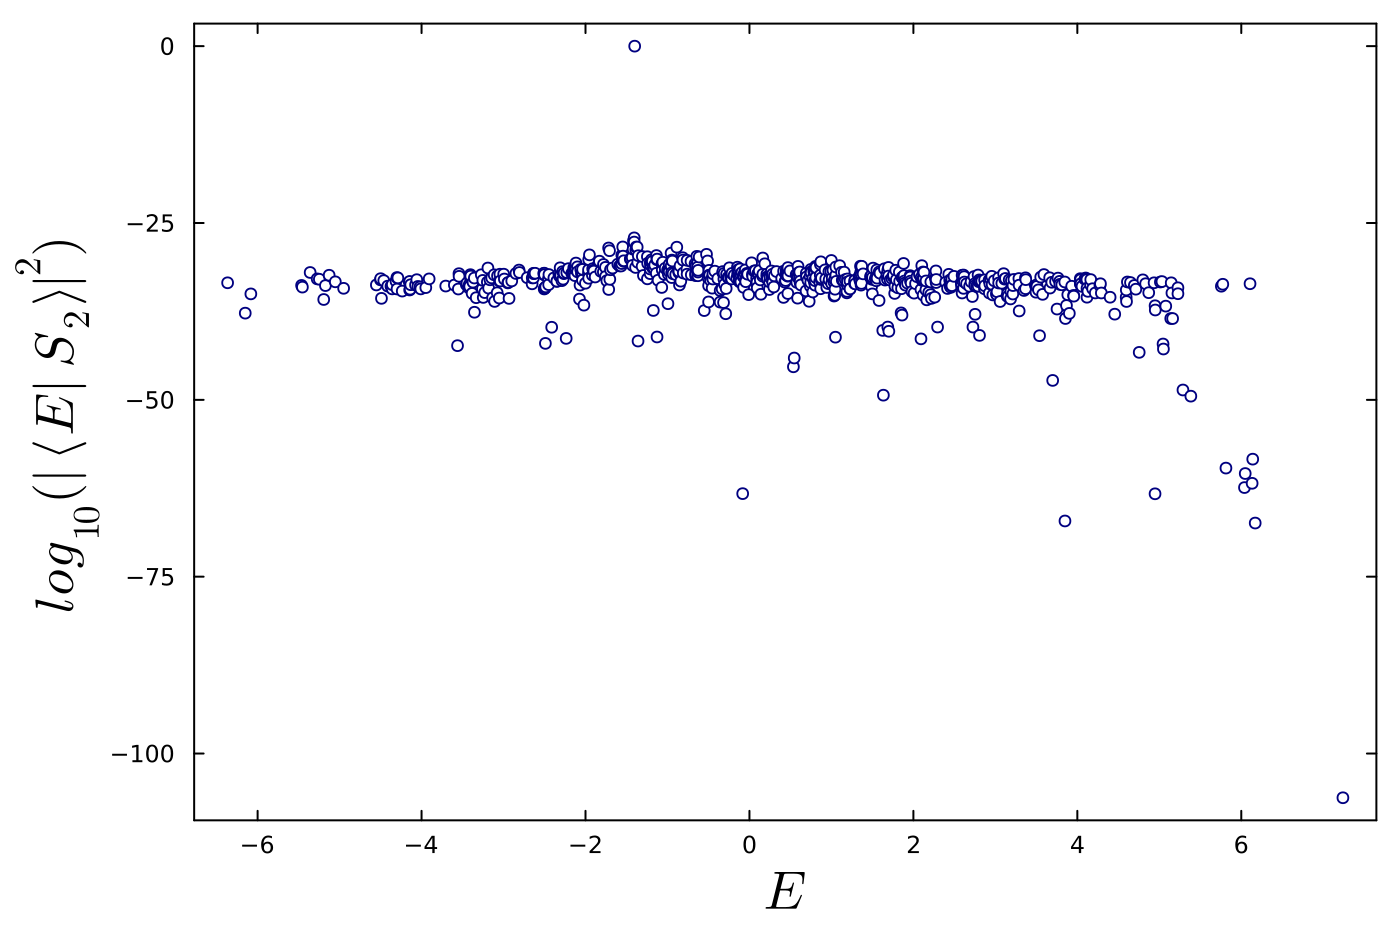

In [8]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

# Set the figure size
plot_size = (700,466.67)

p = scatter(XY_energy,overlap_list,marker=:circle,markercolor=:white,markerstrokecolor=:navy,
            markerstrokewidth=1,ms=3,size=plot_size,dpi=200)

plot!(left_margin=4mm,right_margin=1mm,top_margin=1mm,bottom_margin=2mm)
plot!(framestyle=:box)
plot!(legend=false)
# plot!(legend_position=(0.35,0.92),legendfontsize=12,legend_background_color=:white,legend_foreground_color=:black)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$E\$",guidefontsize=18)
ylabel!("\$log_{10}(|\\langle E | S_{$n} \\rangle |^2)\$",guidefontsize=18)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

xticks = (-8:4:10,string.(-8:4:10))
yticks = vcat(-150:50:10,0)
yticks = (sort(yticks),string.(sort(yticks)))
xminor_ticks = 4
yminor_ticks = 5
# plot!(ylims=(-10,5))
# plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
#       xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:in)

folder_name = "D:\\IACS_Project\\spin-1_XY\\Plots\\1D\\spin-1_XY_N=$(N)\\unperturbed\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Eigenspectrum_Sn=$(n)_overlap_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

#### II) All Scar states overlap

In [5]:
scar_state_list::Vector{Vector{Float64}} = Vector{Vector{Float64}}(undef,N+1)
overlap_list::Vector{Float64} = Vector{Float64}(undef,H_size)
max_overlap_list::Vector{Float64} = Vector{Float64}(undef,N+1)
max_energy_list::Vector{Float64} = Vector{Float64}(undef,N+1)

for n in 0:N
    scar_state_list[n+1] = scar_state_1D(N,n,basis_list)
end

for (n,scar_state) in enumerate(scar_state_list)
    for (i,E) in enumerate(XY_energy)
        overlap_list[i] = log10(abs2(dot(XY_eigenvector[:,i],scar_state)))
    end
    max_overlap, max_index = findmax(overlap_list)
    max_overlap_list[n] = max_overlap
    max_energy_list[n] = XY_energy[max_index]
end;

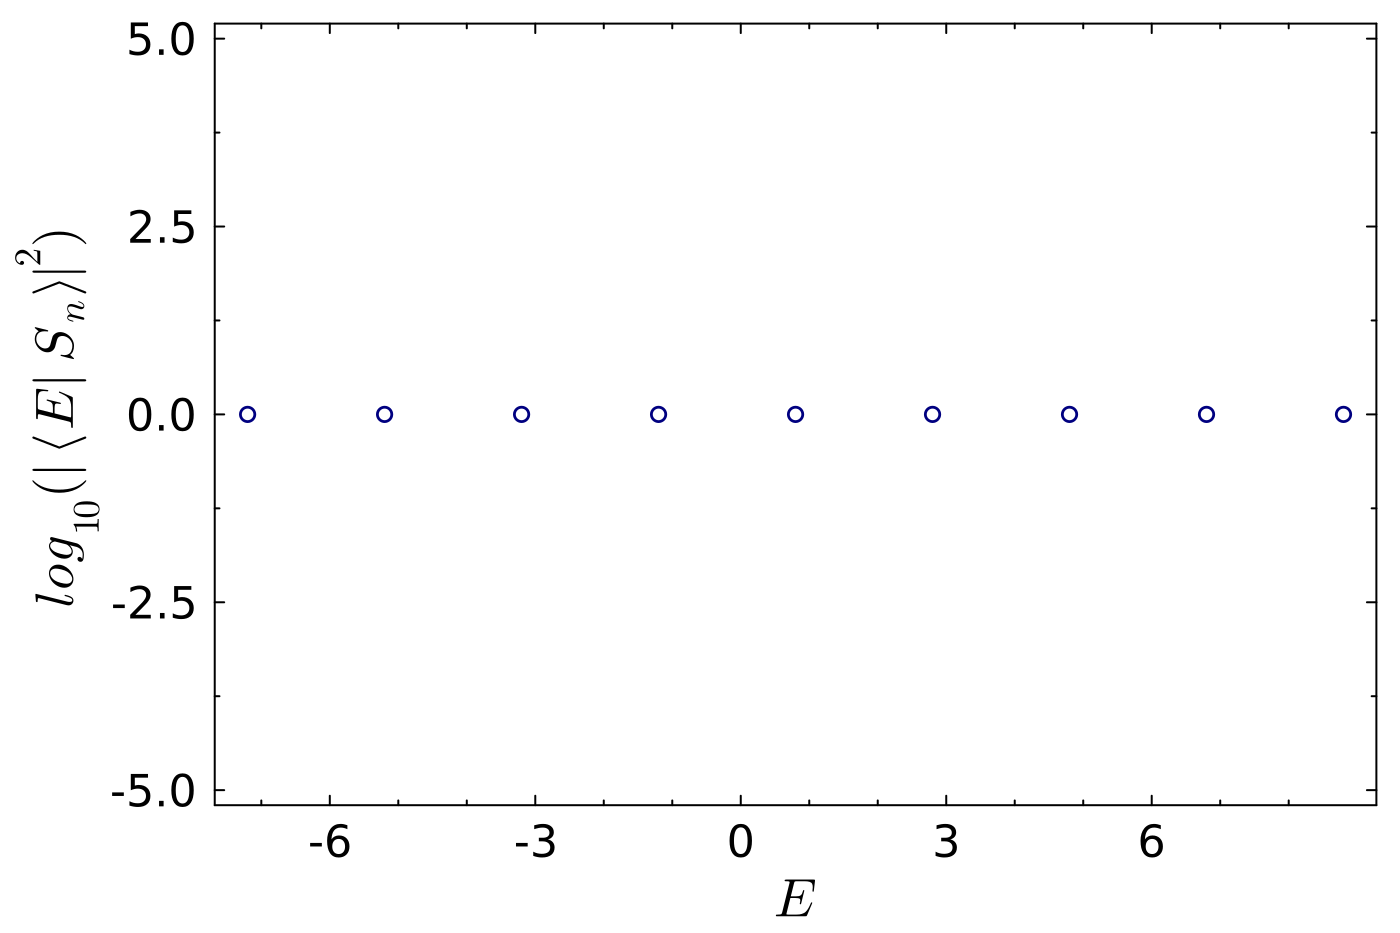

In [12]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

# Set the figure size
plot_size = (700,466.67)

p = scatter(max_energy_list,max_overlap_list,marker=:circle,markercolor=:white,markerstrokecolor=:navy,
            markerstrokewidth=1.5,ms=4,size=plot_size,dpi=200)

plot!(left_margin=4mm,right_margin=1mm,top_margin=1mm,bottom_margin=2mm)
plot!(framestyle=:box)
plot!(legend=false)
# plot!(legend_position=(0.35,0.92),legendfontsize=12,legend_background_color=:white,legend_foreground_color=:black)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$E\$",guidefontsize=18)
ylabel!("\$log_{10}(|\\langle E | S_{n} \\rangle |^2)\$",guidefontsize=18)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = -6,3,8
y1,y_step,y2 = -5,2.5,5
xticks = (x1:x_step:x2,string.(x1:x_step:x2))
yticks = (y1:y_step:y2,string.(y1:y_step:y2))
xminor_ticks = 3 
yminor_ticks = 2
plot!(ylims=(y1-0.2,y2+0.2))
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:in)

folder_name = "D:\\IACS_Project\\spin-1_XY\\Plots\\1D\\spin-1_XY_N=$(N)\\unperturbed\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Eigenspectrum_scar_overlap_spacing_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

### 2) Variation of overlap for a range of $J_2$

#### I) Scar State

In [9]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
n = 1
mz = (2*n-N)
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_full_1D(N)
#     basis_list = gen_basis_mz_1D_op(N,mz)
    println(length(basis_list))
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse)  
end;

729
  0.015078 seconds (19.49 k allocations: 5.478 MiB)


In [10]:
@time XY_energy,XY_eigenvector = eigen(H_XY);

  0.300328 seconds (16 allocations: 12.426 MiB)


In [13]:
scar_state::Vector{Float64} = scar_state_1D(N,n,basis_list)

num_energy_levels::Int64 = 100    # Number of energy levels to track
num_J2::Int64 = 300               # Number of lambda values
scar_E_matrix::Matrix{Float64} = zeros(num_energy_levels,num_J2)  # Energy levels
scar_P_matrix::Matrix{Float64} = zeros(num_energy_levels,num_J2)  # Probability matrix |⟨E_n|S⟩|²

J2_vals::Vector{Float64} = Vector{Float64}((LinRange(0.00,0.05,num_J2)))
sec_nbr_bond_list = gen_2nd_nbr_bonds_1D(N,boundary)
basis_new = similar(basis_list[1])
H_sec_nbr,H_size = Ham_2nd_nbr_1D(N,basis_list,basis_new,sec_nbr_bond_list,use_sparse)
overlap_list::Vector{Float64} = Vector{Float64}(undef,H_size)

@time begin
    for (i,J2) in enumerate(J2_vals)
        H_J2 = J2*H_sec_nbr
        H_total = H_XY + H_J2
        total_energy,total_eigenvector = eigen(H_total)
        for (j,E) in enumerate(total_energy)
            overlap_list[j] = abs2(dot(total_eigenvector[:,j],scar_state))
        end
        max_overlap, max_index = findmax(overlap_list)
#         println(max_overlap," ",max_index)
#         println(energy[max_index])
#         println(overlap_list[max_index-1])
        clip_start::Int64 = max_index-(num_energy_levels/2)
        clip_end::Int64 = max_index+(num_energy_levels/2)
#         println(clip_start," ",clip_end)
        scar_P_matrix[:,i] .= overlap_list[clip_start:clip_end-1]
        scar_E_matrix[:,i] .= total_energy[clip_start:clip_end-1]
    end
end;

113.613775 seconds (4.15 M allocations: 9.748 GiB, 1.64% gc time)


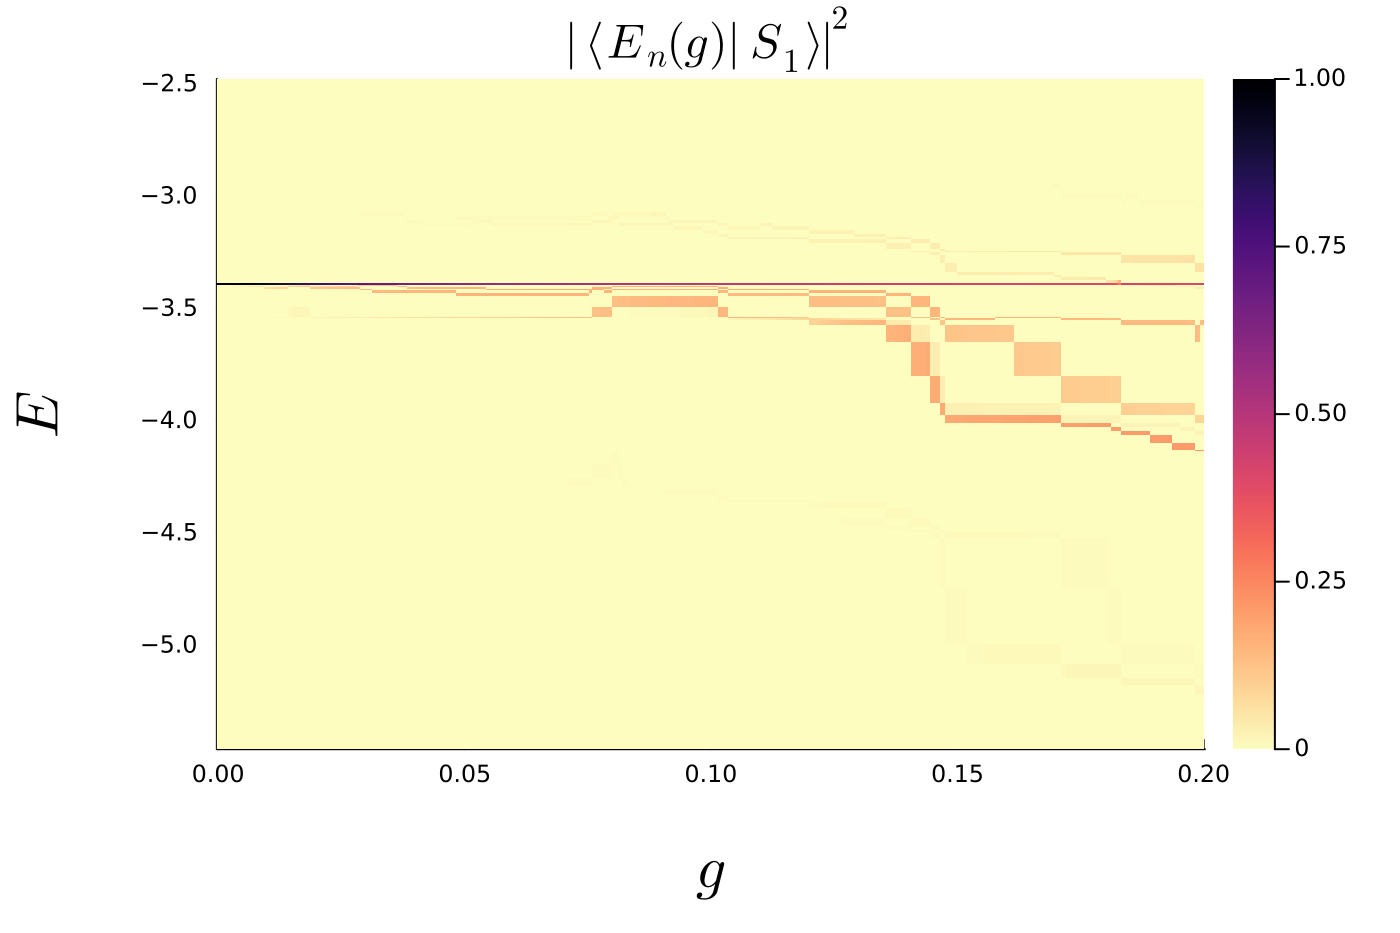

In [14]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

cmap = reverse(cgrad(:magma))

p = heatmap(J2_vals,vec(scar_E_matrix[:,1]),scar_P_matrix,color=cmap,size=plot_size,dpi=200)

plot!(left_margin=4mm,right_margin=5mm,top_margin=1.5mm,bottom_margin=5mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\n\$g\$",guidefontsize=20)
ylabel!("\$E\$\n",guidefontsize=20)
title_text = "\$|\\langle E_n(g) | S_{$n} \\rangle |^2\$"
title!(title_text,titlefontsize=16,pad=12)

x1,x_step,x2 = 0.0,0.01,0.05
y1,y_step,y2 = 4.0,0.5,6.0
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 4 
yminor_ticks = 2
# plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
#       xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:out)
# plot!(ylims=(-4.5,-2.5))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\scar_hybridization"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Sn=$(n)_hybridization_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

#### II) Thermal State

In [12]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
n = 3
mz = (2*n-N)
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_full_1D(N)
#     basis_list = gen_basis_mz_1D(N,mz)
    println(length(basis_list))
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse) 
    XY_energy,XY_eigenvector = eigen(H_XY)
    
    scar_state::Vector{Float64} = scar_state_1D(N,n,basis_list)    
    scar_overlap_list::Vector{Float64} = Vector{Float64}(undef,H_size)
    for (j,E) in enumerate(XY_energy)
        scar_overlap_list[j] = abs2(dot(XY_eigenvector[:,j],scar_state))
    end
end;
scar_max_overlap, scar_max_index = findmax(scar_overlap_list)

729
  0.159945 seconds (29.89 k allocations: 22.356 MiB, 3.74% gc time)


(1.0, 385)

In [13]:
thermal_index = 4
thermal_state = XY_eigenvector[:,(scar_max_index+thermal_index)]

num_energy_levels::Int64 = 100    # Number of energy levels to track
num_J2::Int64 = 300               # Number of lambda values
th_E_matrix::Matrix{Float64} = zeros(num_energy_levels,num_J2)  # Energy levels
th_P_matrix::Matrix{Float64} = zeros(num_energy_levels,num_J2)  # Probability matrix |⟨E_n|S⟩|²

J2_vals::Vector{Float64} = Vector{Float64}((LinRange(0.00,0.05,num_J2)))
sec_nbr_bond_list = gen_2nd_nbr_bonds_1D(N,boundary)
basis_new = similar(basis_list[1])
H_sec_nbr,H_size = Ham_2nd_nbr_1D(N,basis_list,basis_new,sec_nbr_bond_list,use_sparse)
spectrum_overlap_list::Vector{Float64} = Vector{Float64}(undef,H_size)

@time begin
    for (i,J2) in enumerate(J2_vals)
        H_J2 = J2*H_sec_nbr
        H_total = H_XY + H_J2
        total_energy,total_eigenvector = eigen(H_total)
        for (j,E) in enumerate(total_energy)
            spectrum_overlap_list[j] = abs2(dot(total_eigenvector[:,j],thermal_state))
        end
        max_overlap, max_index = findmax(spectrum_overlap_list)
#         println(max_overlap," ",max_index)
#         println(energy[max_index])
#         println(overlap_list[max_index-1])
        clip_start::Int64 = max_index-(num_energy_levels/2)
        clip_end::Int64 = max_index+(num_energy_levels/2)
#         println(clip_start," ",clip_end)
        th_P_matrix[:,i] .= spectrum_overlap_list[clip_start:clip_end-1]
        th_E_matrix[:,i] .= total_energy[clip_start:clip_end-1]
    end
end;

 66.447425 seconds (3.11 M allocations: 7.311 GiB, 1.41% gc time)


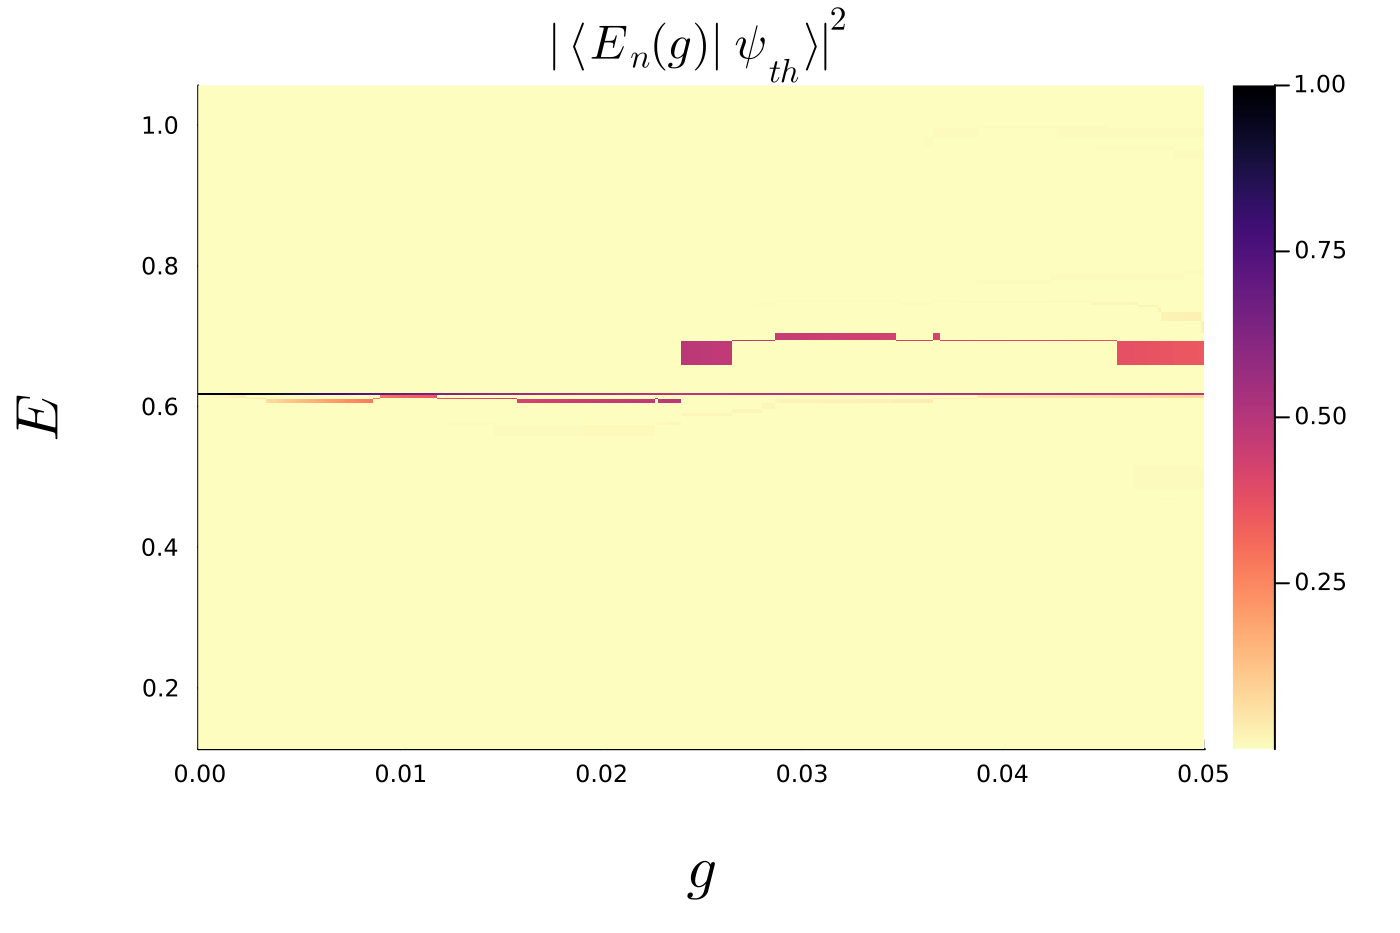

In [14]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

cmap = reverse(cgrad(:magma))

p = heatmap(J2_vals,vec(th_E_matrix[:,1]),th_P_matrix,color=cmap,size=plot_size,dpi=200)

plot!(left_margin=4mm,right_margin=5mm,top_margin=1.5mm,bottom_margin=5mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\n\$g\$",guidefontsize=20)
ylabel!("\$E\$\n",guidefontsize=20)
title_text = "\$|\\langle E_n(g) | \\psi_{th} \\rangle |^2\$"
title!(title_text,titlefontsize=16,pad=12)

x1,x_step,x2 = 0.0,0.01,0.05
y1,y_step,y2 = 0.2,0.2,1.0
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 4 
yminor_ticks = 2
# plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
#       xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:out)
# plot!(ylims=(3.8,6))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\thermal_state_hybridization"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"thermal_state_$(thermal_index)_hybridization_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

### 3) Variation of entanglement entropy for a range of $J_2$

In [3]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_full_1D(N)
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse)  
end;

  0.186977 seconds (319.73 k allocations: 26.044 MiB, 3.41% gc time, 91.89% compilation time)


In [4]:
n::Int64 = 3
scar_state::Vector{Float64} = scar_state_1D(N,n,basis_list);

In [10]:
num_energy_levels::Int64 = 100    # Number of energy levels to track
num_J2::Int64 = 400               # Number of lambda values
E_matrix::Matrix{Float64} = zeros(num_energy_levels,num_J2)  # Energy levels
S_matrix::Matrix{Float64} = zeros(num_energy_levels,num_J2)  # Entanglement matrix S_A

J2_vals::Vector{Float64} = Vector{Float64}((LinRange(0.00,0.05,num_J2)))
sec_nbr_bond_list = gen_2nd_nbr_bonds_1D(N,boundary)
basis_new = similar(basis_list[1])
overlap_list::Vector{Float64} = Vector{Float64}(undef,H_size)
entropy_list::Vector{Float64} = Vector{Float64}(undef,H_size)
size_A = size_B = Int64(N/2)

@time begin
    for (i,J2) in enumerate(J2_vals)
        H_sec_nbr,H_size = Ham_2nd_nbr_1D(J2,N,basis_list,basis_new,sec_nbr_bond_list,use_sparse)
        H_total = H_XY + H_sec_nbr
        total_energy,total_eigenvector = eigen(H_total)
        for (j,E) in enumerate(total_energy)
            overlap_list[j] = abs2(dot(total_eigenvector[:,j],scar_state))
            entropy_list[j] = bipartite_entang_entropy(total_eigenvector[:,j],1,size_A,size_B)
        end
        max_overlap, max_index = findmax(overlap_list)
#         println(max_overlap," ",max_index)
#         println(energy[max_index])
#         println(overlap_list[max_index-1])
        clip_start::Int64 = max_index-(num_energy_levels/2)
        clip_end::Int64 = max_index+(num_energy_levels/2)
#         println(clip_start," ",clip_end)
        S_matrix[:,i] .= entropy_list[clip_start:clip_end-1]
        E_matrix[:,i] .= total_energy[clip_start:clip_end-1]
    end
end;

100.626381 seconds (13.49 M allocations: 18.158 GiB, 1.86% gc time, 0.00% compilation time)


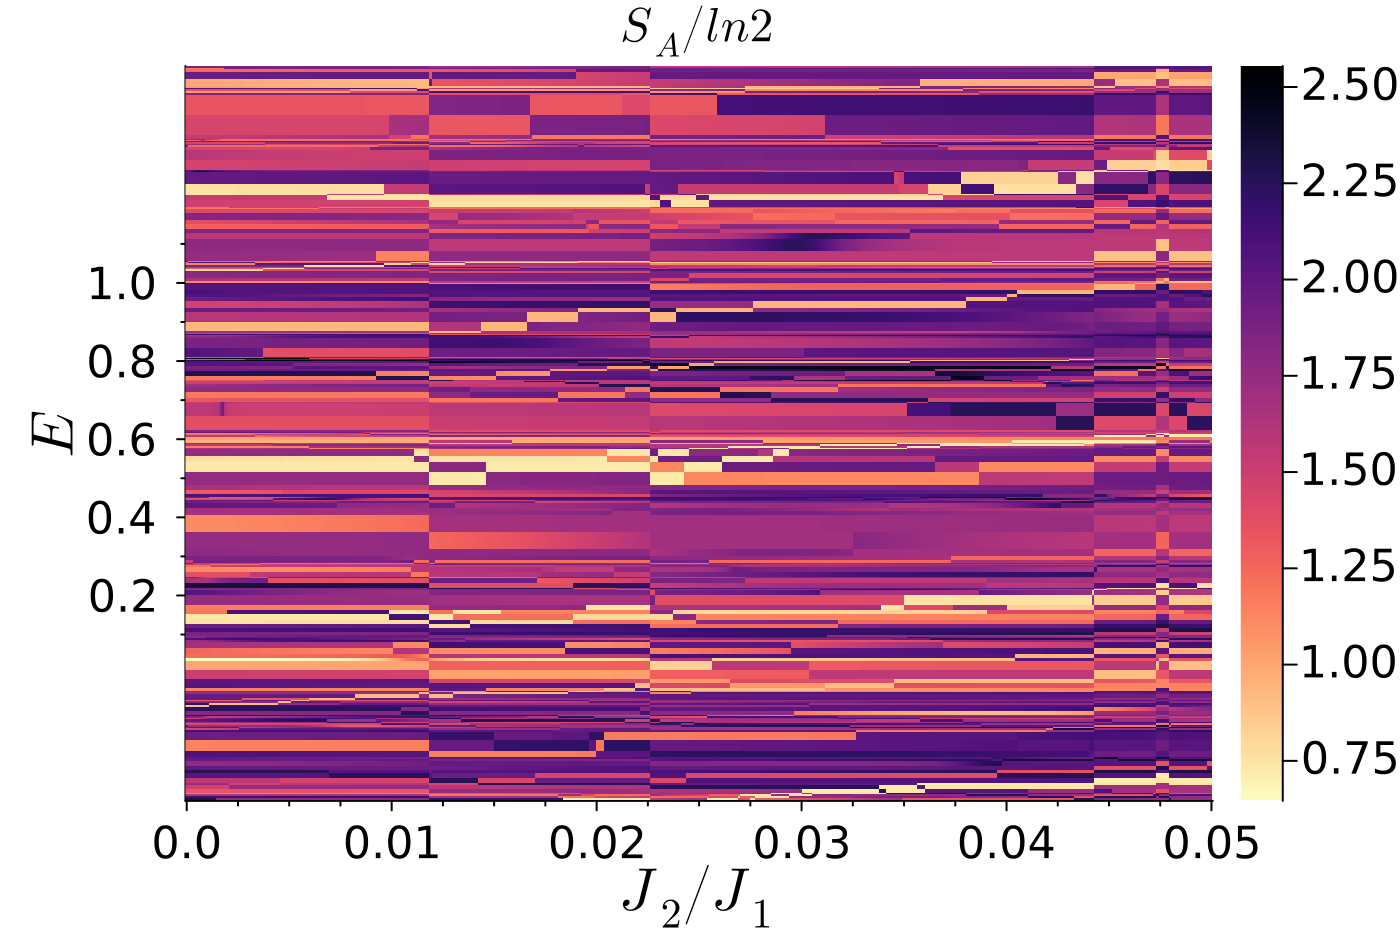

In [11]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

cmap = reverse(cgrad(:magma))

p = heatmap(J2_vals,vec(E_matrix[:,1]),S_matrix,color=cmap,size=plot_size,dpi=200)

plot!(left_margin=4mm,right_margin=4mm,top_margin=1mm,bottom_margin=2mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\$J_2/J_1\$",guidefontsize=20)
ylabel!("\$E\$",guidefontsize=20)
title_text = "\$S_A/ln2\$"
title!(title_text,titlefontsize=16,pad=12)

x1,x_step,x2 = 0.0,0.01,0.05
y1,y_step,y2 = 0.2,0.2,1.0
xticks = (x1:x_step:x2,string.(x1:x_step:x2))
yticks = (y1:y_step:y2,string.(y1:y_step:y2))
xminor_ticks = 4 
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:out)
# plot!(ylims=(-4.5,-2.5))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\scar_hybridization"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Sn=$(n)_hybridization_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)